# Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

**Описание данных**

Таблица *mkrf_movies* содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

* ***title*** — название фильма;
* ***puNumber*** — номер прокатного удостоверения;
* ***show_start_date*** — дата премьеры фильма;
* ***type*** — тип фильма;
* ***film_studio*** — студия-производитель;
* ***production_country*** — страна-производитель;
* ***director*** — режиссёр;
* ***producer*** — продюсер;
* ***age_restriction*** — возрастная категория;
* ***refundable_support*** — объём возвратных средств государственной поддержки;
* ***nonrefundable_support*** — объём невозвратных средств государственной поддержки;
* ***financing_source*** — источник государственного финансирования;
* ***budget*** — общий бюджет фильма;
* ***ratings*** — рейтинг фильма на КиноПоиске;
* ***genres*** — жанр фильма.

Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица *mkrf_shows* содержит сведения о показах фильмов в российских кинотеатрах.
* ***puNumber*** — номер прокатного удостоверения;
* ***box_office*** — сборы в рублях.

# Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

В начале импортируем необходимые нам для работы библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Далее формируем датафреймы из исходных данных:

In [2]:
try:
    data = pd.read_csv('mkrf_movies.csv')
    data2 = pd.read_csv('mkrf_shows.csv')
except:
    data = pd.read_csv('/datasets/mkrf_movies.csv')
    data2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
print(data.info())
print()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

По первоначальной общей информации можем уже сделать вывод о пропусках в данных (например, отсутствие большого количества данных в столбцах ***refundable_support***, ***nonrefundable_support***, ***budget*** и ***financing_source***). Также видим ошибки в типах данных нескольких столбцов (для столбца ***show_start_date*** нужен тип данных datetime; для столбца ***puNumber***, по которому мы и будем объединять датафреймы, необходимо привести к целочисленному типу данных).

Посмотрим, во всех ли строках столбец ***puNumber*** имеет численное значение, чтобы имет возможность перевести тип данных из *object* в *int*:

In [6]:
data[~data['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Видим две строчки, которые могут нам помешать. В первом случае видим числовое значение, но предположительно там есть лишние пробелы, от которых предстоит избавиться. Во втором случае поменяем значение на 0:

In [7]:
data['puNumber'] = data['puNumber'].replace(' ', '')
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0

In [8]:
data['puNumber'] = data['puNumber'].astype('int')

Теперь есть все условия для того, чтобы объединить два датафрейма:

In [9]:
data = data.merge(data2, on='puNumber', how='left')

Далее загружаем общую информацию, чтобы иметь первоначальное представление о данных:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


In [12]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

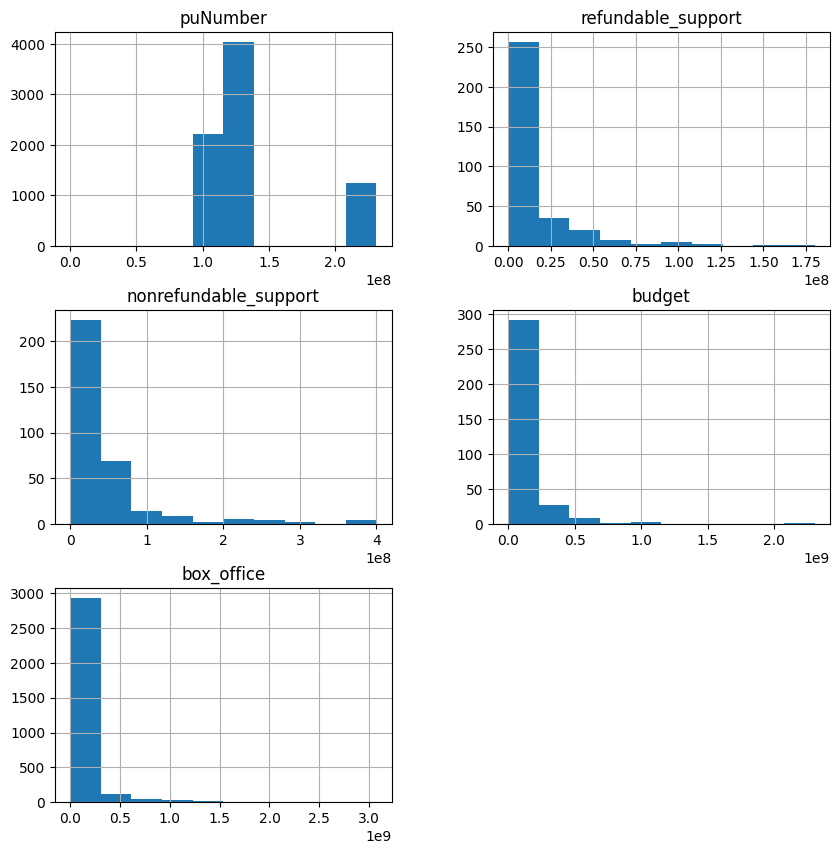

In [13]:
data.hist(figsize=(10, 10))
plt.show()

# Шаг 2. Предобработка данных

## Шаг 2.1. Проверка типов данных

Для начала поменяем тип данных в столбце ***show_start_date*** на типа *datetime*:

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Есть смысл также для удобства сразу же округлить данные до дня:

In [15]:
data['show_start_date'] = data['show_start_date'].dt.round('1D')

In [16]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Видим также, что ***ratings*** имеет строковой тип значения. Посмотрим уникальные значения, которые лежат в этом столбце:

In [17]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Откуда-то появились процентные значения и не совсем понятно, как же они относятся к итоговому рейтингу фильма. Посмотрим, как много строк имеет в рейтинге процентное значение:

In [18]:
bad_ratings = ['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']
data.query('ratings == @bad_ratings')['ratings'].count()

29

Таких строк не так много, поэтому заменим эти значения на отсутствующие:

In [19]:
data.loc[data['ratings'].isin(bad_ratings), 'ratings'] = np.nan
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

Теперь можем менять тип данных столбца на *float*:

In [20]:
data['ratings'] = pd.to_numeric(data['ratings'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

## Шаг 2.2. Изучим пропуски в датафрейме

В начале посчитаем отсутствующие значения в каждом из столбцов и проанализируем результаты:

In [21]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Отдельно выведем строки, где есть пропущенные значения в столбце ***production_country***:

In [22]:
data[data['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


По результатам видим, что это кинокартины, которые были произведены в России, поэтому так и заполним пропуски этого столбца:

In [23]:
data['production_country'] = data['production_country'].fillna('Россия')

Далее заполним пропуски в столбцах ***film_studio***, ***director***, ***producer*** и ***genres***. Предположим, что пропуски в ***film_studio*** обусловленны тем, что фильмы авторские и не спонсируются какой-либо студио. Рассчитать значения для пропусках в остальных столбцах не является возможным, поэтому в этих столбцах заменим пропуски на стандартное значение <*unknown*>, которое будет нам сообщать при расчётах о наличии пропусков в исходных данных: 

In [24]:
data['film_studio'] = data['film_studio'].fillna('<unknown>')
data['director'] = data['director'].fillna('<unknown>')
data['producer'] = data['producer'].fillna('<unknown>')
data['genres'] = data['genres'].fillna('<unknown>')
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                      0
box_office               4328
dtype: int64

Пропущенные значения в столбцах ***ratings*** и ***box_office*** заполнить логически не можем, поэтому оставим в этих столбцах пропуски, чтобы понимать, что это пропущенные значения в будущих расчётах.

Рассмотрим столбцы ***refundable_support***, ***nonrefundable_support***, ***budget*** и ***financing_source***. Пропуски здесь могут нам говорить только о том, что фильмы не спонсировались государственными организациями. Поэтому в столбцах ***refundable_support***, ***nonrefundable_support*** и ***budget*** пропуски заменяем на 0, а в столбце ***financing_source*** - на "*не спонсируется*":

In [25]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['budget'] = data['budget'].fillna(0)
data['financing_source'] = data['financing_source'].fillna('не спонсируется')

In [26]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   996
genres                      0
box_office               4328
dtype: int64

## Шаг 2.3. Изучим дубликаты в датафрейме

Для начала выясним, есть ли в наших данных явные дубликаты и строки, которые полностью повторяют друг друга:

In [27]:
data.duplicated().sum()

0

Видим, что явные дубликаты отсутствуют. Если логически взглянуть на наши столбцы, то дубликаты в данных мы можем увидеть, если более подробно проанализируем стодбцы ***title*** и ***puNumber***, так как именно они говорят нам об уникальности строки. Посмотрим строки, в которых есть дубли по столбцу ***title***:

In [28]:
data[data.duplicated('title', keep=False)].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,7.7,"боевик,драма,криминал",NaN
33,Перелом,221006016,2016-02-09,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Касл Рок Инте...",США-Германия,Грегори Хоблит,Чарльз Уэйнсток,«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,7.7,"триллер,драма,криминал",NaN
34,Мисс Поттер,221011915,2015-04-03,Художественный,"Феникс Пикчерз, Дэвид Киршнер Продакшнз, Айл о...",США - Великобритания,Крис Нунан,"Дэвид Киршнер, Майк Медэвой, Арнольд Мессер, К...",«12+» - для детей старше 12 лет,0.0,0.0,0.0,не спонсируется,7.3,"драма,мелодрама,биография",NaN
37,Молчи в тряпочку,221012015,2015-04-03,Художественный,"Саммит Интертейнмент, Айл оф Мэн Филм, Эйзур Ф...",Великобритания,Найл Джонсон,"Мэтью Пэйн, Джулия Пэло",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,7.1,"комедия,криминал",NaN
40,Алекс и Эмма,221005015,2015-02-26,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,6.4,"мелодрама,комедия",NaN


Видим, что под одним и тем же названием фильмов несколько строк, но у всех разные прокатные удостоверения. Это может объясняться тем, что фильм выходил в прокат несколько раз или мог поменять правообладателя или даже быть немного изменён для каких-либо творческих или коммерческих целей. Поэтому одному и тому же фильму могло выдаваться несколько прокатных удостоверений. Исходя из этого мы не можем удалить повторяющиеся строки, так как потеряем уникальные данные прокатных удостоверений.

Далее посмотрим дубли столбца ***puNumber***:

In [29]:
data[data.duplicated('puNumber', keep=False)].head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,не спонсируется,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,не спонсируется,6.8,"комедия,криминал",NaN


По результатам можно отметить, что два прокатных удостоверения не уникальны, на каждый из них зарегестрированно по два разных фильма. Можем предположить, что такое могло произойти по ошибке в данных, или, возможно, эти фильмы шли вместе друг за другом за один сеанс. От таких строк тоже не можем избавиться, так как потеряем данные о фильмах.

## Шаг 2.4. Изучим категориальные значения

Выполним первым действием то, о чём говорится в подсказке к столбцу ***type***:

In [30]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Все данные в этом столбце уникальны, поэтому идём далее. Рассмотрим столбец ***production_country***:

In [31]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [32]:
data['production_country'].nunique()

950

Можем увидеть, что в строках, где указано несколько стран, нет единого разделителя. Где-то используется *' - '*, где-то *'-'*, а где-то ', '. Поэтому заменим всё к единому виду:

In [33]:
data['production_country'] = data['production_country'].str.replace(' - ', ', ')
data['production_country'] = data['production_country'].str.replace('-', ', ')

In [34]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия, Великобритания', 'Великобритания, Италия',
       'Чехословакия', 'США, Франция, Турция', 'Новая Зеландия',
       'Канада, Франция, Испания', 'США, Германия', 'США, Великобритания',
       'Великобритания', 'Франция, Мексика, США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания, США, Германия, КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США, Франция', 'США, Япония, Франция, Великобритания',
       'Гонконг, Сингапур, Таиланд, Великобритания', 'США, Канада',
       'Франция, Италия, Великобритания, США', 'Франция, США',
       'Ирландия, Великобритания, Германия', 'Чехия', 'США, Австралия',
       'СССР, Финляндия', 'США, Франция, Великобритания, Австрия',
       'США, Бельгия', 'США, Ирландия, Великобритания',
       'Великобритания, США',
       'Люксембург, Нидерланды, Испания, Великобритания,

In [35]:
data['production_country'].nunique()

835

Такое решение повлияло не только на восприятие информации, но и на количество уникальных значений в столбце. Переходим к столбцу **age_restriction**:

In [36]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь с данными всё в порядке. Как и в столбце ***financing_source***:

In [37]:
data['financing_source'].unique()

array(['не спонсируется', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Посмотрим на уникальные значения столбца ***genres***:

In [38]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', '<unknown>', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ком

Видим не очень удобный способ разделения жанров, который мешает восприятию. Добавим пробел после запятой:

In [39]:
data['genres'] = data['genres'].str.replace(',', ', ')

In [40]:
data['genres'].unique()

array(['боевик, драма, мелодрама', 'драма, военный',
       'фантастика, боевик, триллер', 'драма', 'мелодрама, комедия',
       'мюзикл, мелодрама, комедия', 'комедия, криминал',
       'боевик, триллер, детектив', 'боевик, драма, приключения',
       'драма, спорт', 'триллер, драма, мелодрама', 'комедия, мелодрама',
       'драма, мелодрама, комедия', 'драма, мелодрама', 'драма, история',
       'драма, мелодрама, семейный', 'комедия, мелодрама, криминал',
       'комедия', 'боевик, драма, криминал', 'драма, комедия',
       'ужасы, фантастика, комедия',
       'мультфильм, короткометражка, мелодрама', 'драма, криминал',
       'мультфильм, фантастика, фэнтези', 'триллер, драма, криминал',
       'драма, мелодрама, биография', 'драма, комедия, военный',
       'фантастика, драма, детектив', 'мюзикл, семейный', '<unknown>',
       'военный, приключения, драма', 'документальный, драма',
       'драма, биография, история', 'боевик, триллер, драма',
       'фэнтези, боевик', 'боевик, ком

## Шаг 2.5. Проверим количественные значения

Проверим, есть ли у нас строчки, где бюджет меньше, чем сумма финансирования:

In [41]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-20,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-27,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-27,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-22,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия, драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-02,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-17,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Видим, что такие строки есть. Напишем функцию, которая будет заменять значения в столбце **budget** на сумму финансирования, если она окажется меньше. В остальных строчках оставим прежнее значение:

In [42]:
def true_budget(row):
    budget = row['budget']
    suma = row['refundable_support'] + row['nonrefundable_support']
    if budget < suma:
        return suma
    return budget

data['budget'] = data.apply(true_budget, axis=1)

Проверим действие функции:

In [43]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Больше не осталось строк, где бюджет меньше, чем финансирование, поэтому делаем вывод, что функция сработала.

Округлим столбцы, в которых речь идёт о финансировании, бюджете и сборах до миллионов, так как мы всё-таки привыкли слышать и видеть такие суммы затрат на фильмы, а также это упростит работу с данными в дальнейших расчётах и построениях графиков:

In [44]:
data['refundable_support'] = (data['refundable_support'] / 1000000).round(2)
data['nonrefundable_support'] = (data['nonrefundable_support'] / 1000000).round(2)
data['budget'] = (data['budget'] / 1000000).round(2)
data['box_office'] = (data['box_office'] / 1000000).round(2)

Далее рассмотри остальные количественные столбцы на наличие аномальных явлений и выбросов с помощью гистограмм. Начнём со столбца ***ratings***:

<Axes: >

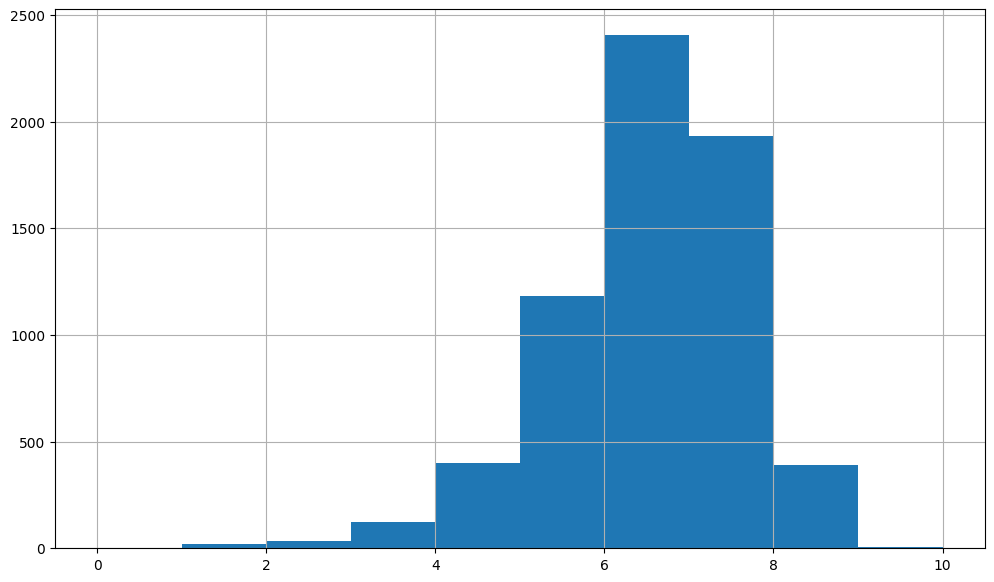

In [102]:
data['ratings'].hist(range=(0, 10), bins=10, figsize=(12, 7))

По графику видим нормальное распределение, поэтому делаем вывод, что с этими данными всё хорошо.

Далее рассмотрим столбцы, связанные с бюджетом и финансированием (***refundable_support***, ***nonrefundable_support*** и **budget**):

<Axes: >

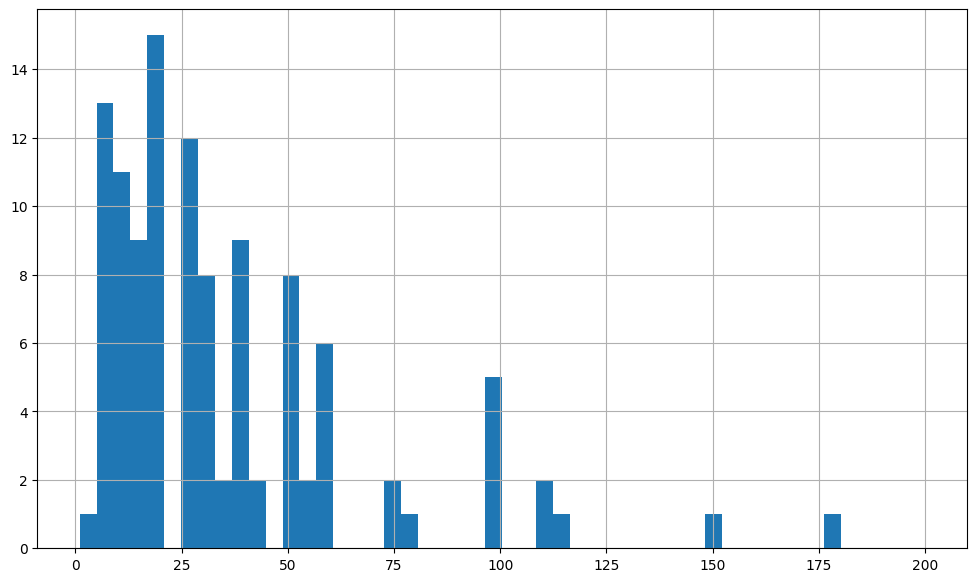

In [98]:
data['refundable_support'].hist(range=(1, 200), bins=50, figsize=(12, 7))

<Axes: >

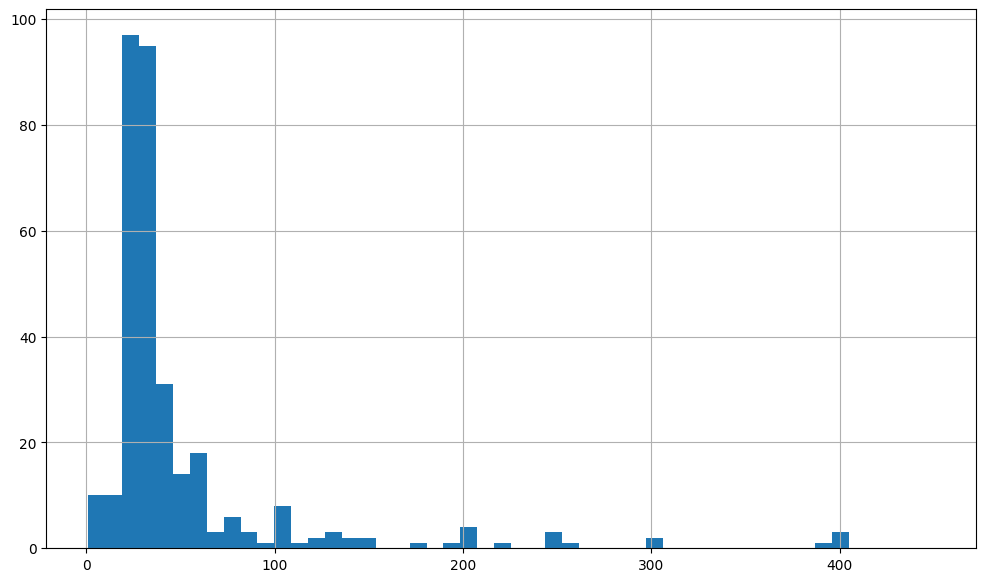

In [100]:
data['nonrefundable_support'].hist(range=(1, 450), bins=50, figsize=(12, 7))

<Axes: >

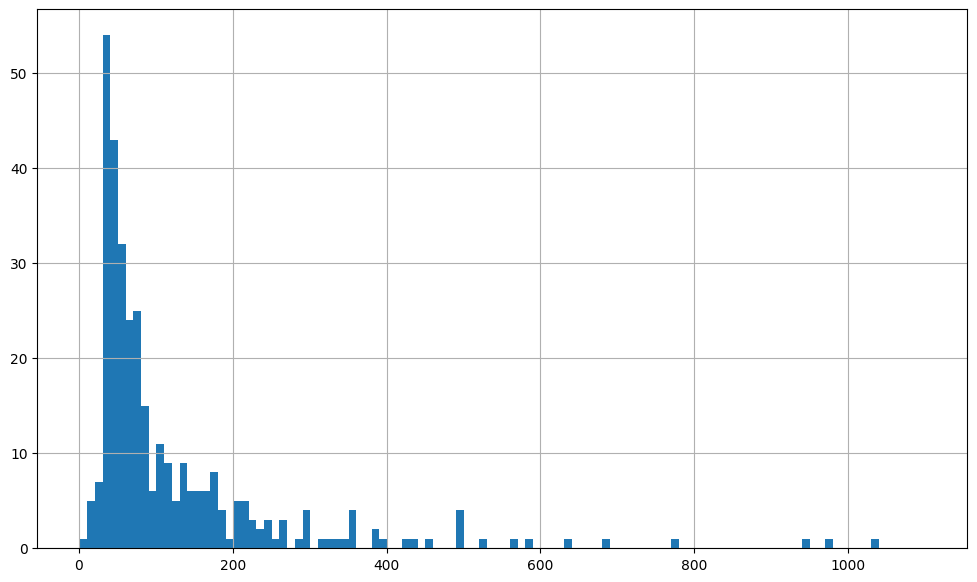

In [101]:
data['budget'].hist(range=(1, 1100), bins=110, figsize=(12, 7))

Во всех случаях видим распределение Пуассона с очень длинным хвостом. Это может говорить нам о выбросах в данных и аномальных значениях. Появиться они могли из-за сложных и затратных кинокартин, которые требуют очень большого бюджета для их реализации. Удалить такие строки из датафрейма в нашем случае мы не можем, так как потеряем ценные данные о кинокартинах, которые могут потребоваться нам для дальнейших расчётов.

Остался последний количественный столбец *box_office*:

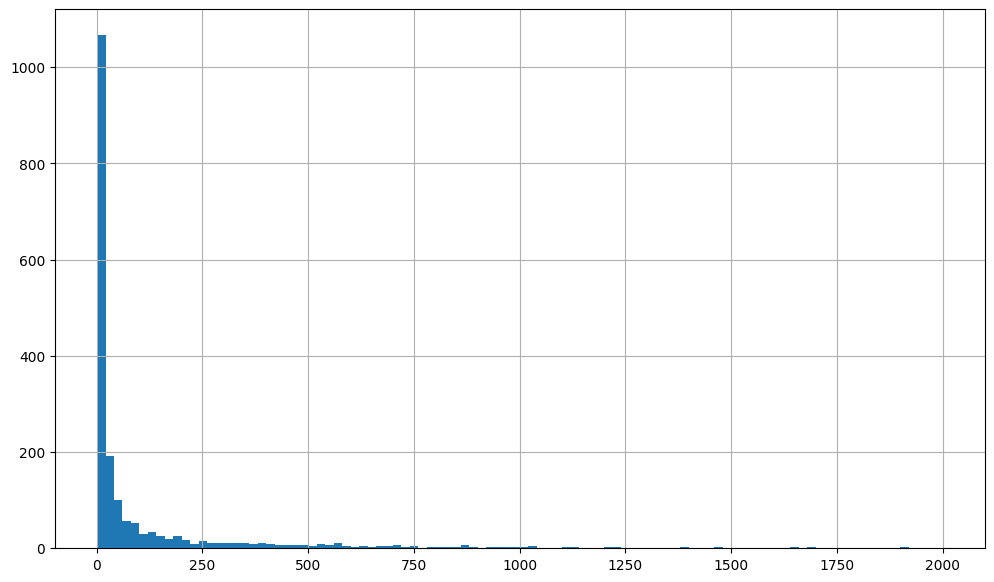

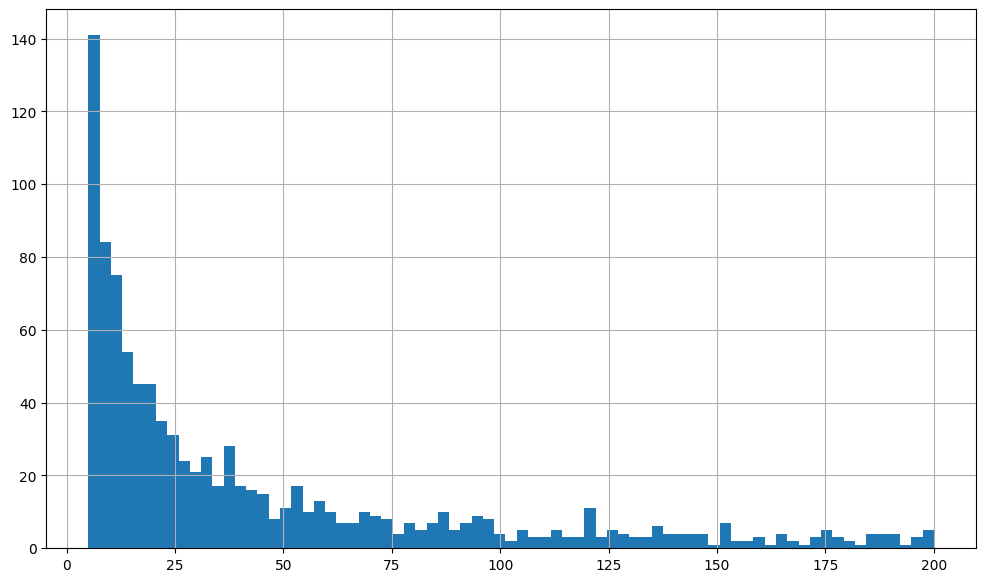

In [113]:
data['box_office'].hist(range=(1, 2000), bins=100, figsize=(12, 7))
plt.show()
data['box_office'].hist(range=(5, 200), bins=75, figsize=(12, 7))
plt.show()

Наблюдаем также распределение Пуассона с длинным хвостом и очень большим пиковым значением близким к 0. Можем предположить, что в наших исходных данных много кинокартин с маленькими кассовыми сборами, а также некоторое количество блокбастеров, которые напротив собрали много прибыли в прокате. Несмотря на то, что это аномалии, мы также не можем удалить такие значения, так как они помогут нам в будущих расчётах.

## Шаг 2.6. Добавим новые столбцы

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [ ]:
data['show_start_year'] = pd.DatetimeIndex(data['show_start_date']).year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,7.2,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,<unknown>,«6+» - для детей старше 6 лет,0.0,0.0,0.0,не спонсируется,6.6,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2016
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2015


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [ ]:
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,7.2,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,<unknown>,«6+» - для детей старше 6 лет,0.0,0.0,0.0,не спонсируется,6.6,"драма, военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,не спонсируется,6.8,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
data['share_of_funding'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).round(2)
data[data['refundable_support'] != 0].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,share_of_funding
1870,А зори здесь тихие..._,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,<unknown>,«12+» - для детей старше 12 лет,50.0,100.0,220.59,Фонд кино,8.5,"драма, военный, история",249.17,2015,Р.Давлетьяров,драма,0.68
1987,Елки Лохматые,111023114,2014-12-10,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+» - для детей старше 6 лет,26.0,30.0,80.00,Фонд кино,5.0,"семейный, комедия",121.23,2014,Максим Свешников,семейный,0.70
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-14,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+» - для любой зрительской аудитории,30.0,40.0,252.49,Фонд кино,6.5,"мультфильм, фэнтези, приключения",313.49,2014,А.Цицилин,мультфильм,0.28
2142,Территория,111000515,2015-01-27,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30.0,30.0,500.00,Фонд кино,6.8,"детектив, фэнтези, триллер",72.58,2015,А.Мельник,детектив,0.12
2288,12 месяцев. Новая сказка,111014414,2014-10-17,Художественный,"ООО ""Киностудия ""Никола-фильм"", ООО ""Инвестмен...",Россия,Д.Елеонский,И.Каленов,«0+» - для любой зрительской аудитории,15.0,5.0,90.12,Фонд кино,3.8,"семейный, фэнтези",32.24,2014,Д.Елеонский,семейный,0.22


# Шаг 3. Проведём исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Для того, чтобы отфильтровать фильмы с информацией о прокате в кинотеатрах используем логическую индексацию по столбцу ***box_office***. Далее строим сводную таблицу и получаем информацию о количестве фильмов за каждый год:

In [ ]:
cinema_year = data[data['box_office'].isna() == False]
cinema_year.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')

,puNumber
show_start_year,
2010,105
2011,109
2012,127
2013,185
2014,279
2015,465
2016,526
2017,357
2018,475


Для наглядности построим столбчатую диаграмму:

<Axes: xlabel='show_start_year'>

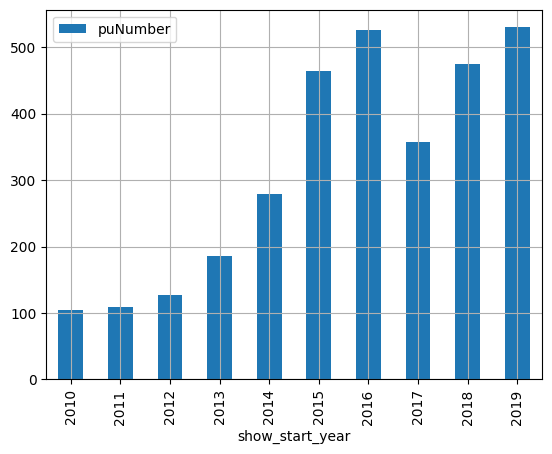

In [ ]:
cinema_year.pivot_table(index='show_start_year', values='puNumber', aggfunc='count') \
           .plot(kind='bar', grid=True)

На графике очевидна тенденция увелечения количества фильмов в прокате кинотеатров с прошествием времени. Если в 2010 году в прокат кинотеатров выходило чуть больше 100 фильмов, то в 2016 уже 526. В следующем году можем отметить небольшой упадок, но уже в 2019 году в прокате снова более 500 кинокартин.

Далее вычислим долю фильмов, которые шли в кинотеатрах по отношению к общему количеству данных за все года:

In [ ]:
print('Доля фильмов с указанной информацией о прокате:', \
      cinema_year['puNumber'].count() / data['puNumber'].count()) 

Доля фильмов с указанной информацией о прокате: 0.42185412770504943


Доля фильмов в прокате состовляет меньше половины (чуть больше 42%) по отношению к общему числу кинокартин за 10 лет.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Построим сводную таблицу и просуммируем сборы фильмов с прокатов в кинотеатрах по годам:

In [ ]:
cinema_year.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')

,box_office
show_start_year,
2010,2.36
2011,14.04
2012,6.90
2013,29.68
2014,7444.82
2015,39497.25
2016,47866.34
2017,48563.73
2018,49668.39


Снова замечаем значительный рост показателей с течением времени. Минимальная сумма сборов была в 2010 (2,36 млн руб), а максимальная - в 2018 (49,67 млрд руб). Для наглядного представления построим график по полученным данным:

<Axes: xlabel='show_start_year'>

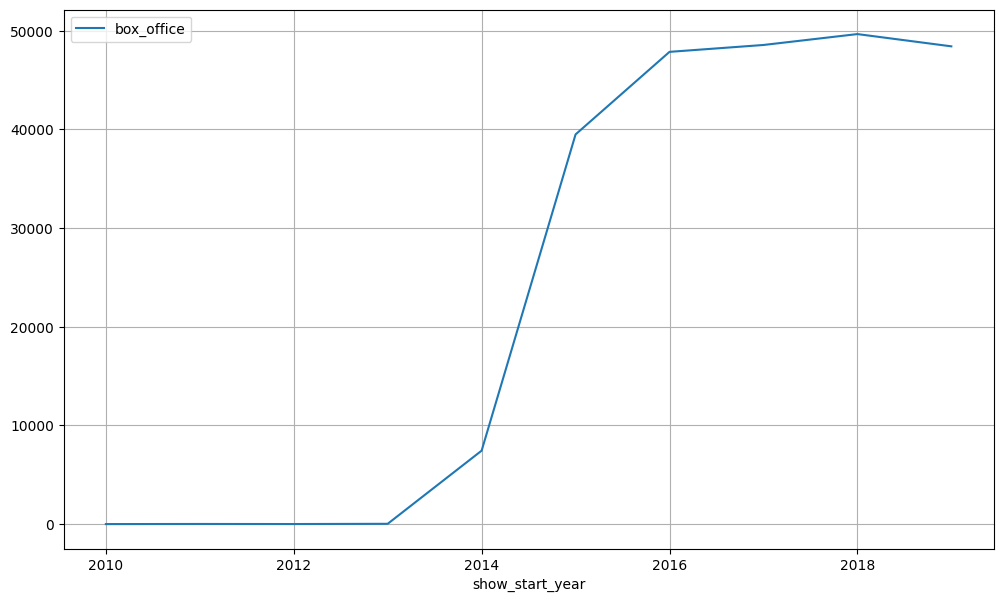

In [ ]:
cinema_year.pivot_table(index='show_start_year', values='box_office', aggfunc='sum') \
           .plot(kind='line', grid=True, figsize=(12, 7))

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [ ]:
cinema_year.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
show_start_year,,
2010,0.022476,0.000
2011,0.128807,0.000
2012,0.054331,0.010
2013,0.160432,0.000
2014,26.683943,0.020
2015,84.940323,4.920
2016,91.000646,3.850
2017,136.032857,9.970


По сводной таблице видим, как сильно выбросы влияют на среднее значение. Так, например, в 2017 году среднее и медианное знаячение отличается аж в 15 раз. Медианное значение выглядит более стабильным и более правдоподобным.

<Axes: xlabel='show_start_year'>

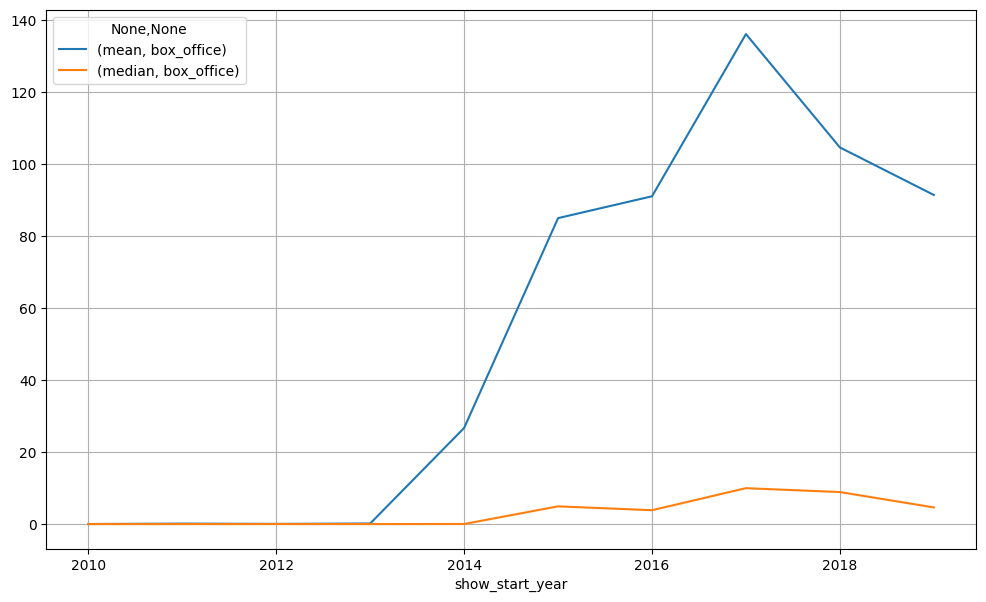

In [ ]:
cinema_year.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median']) \
           .plot(kind='line', grid=True, figsize=(12, 7))

Несмотря на такую большую разницу в данных, наблюдается увеличение кассовых сборов с 2010 года по 2017, а после неожиданное снижение.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

Построим сводную таблицу, по которой сможем создать график для визуализации результатов:

In [ ]:
cinema_year.pivot_table(index='show_start_year',
                        columns='age_restriction', 
                        values='box_office', 
                        aggfunc='sum') \
            .query('show_start_year > 2014')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015,379.05,13616.05,11368.09,5432.29,8701.77
2016,150.19,12204.46,16664.60,6793.93,12053.16
2017,229.60,7851.44,18745.02,9651.52,12086.15
2018,32.45,14267.31,16503.62,8760.04,10104.97
2019,17.75,12680.19,12753.42,10121.83,12852.56


<Axes: xlabel='show_start_year'>

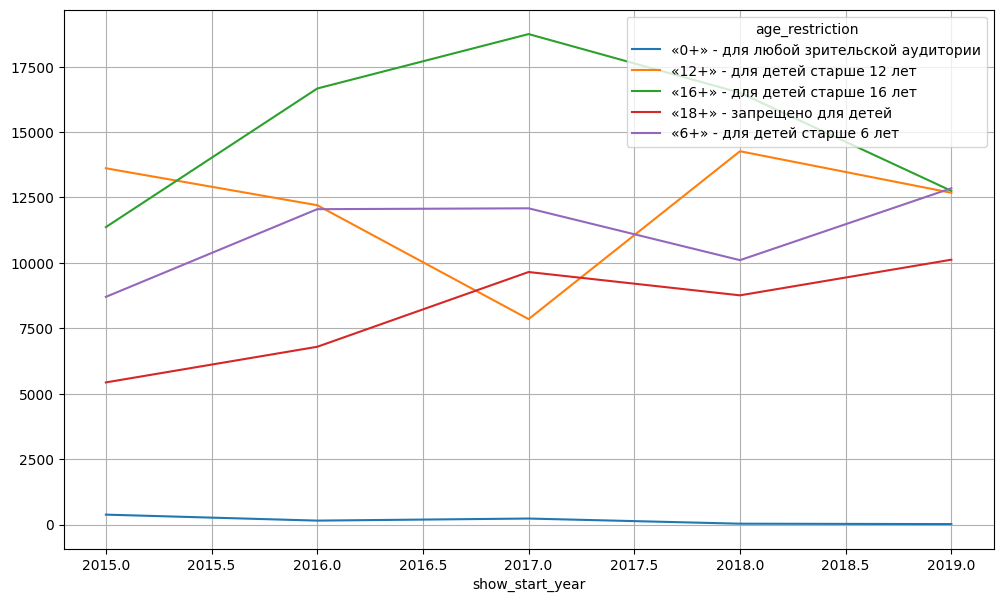

In [ ]:
cinema_year.pivot_table(index='show_start_year',
                        columns='age_restriction', 
                        values='box_office', 
                        aggfunc='sum') \
            .query('show_start_year > 2014') \
            .plot(kind='line', grid=True, figsize=(12, 7))

Делаем вывод, что почти во все года по суммам сборов лидируют фильмы с рейтингом возраста 16+ (кроме 2015, здесь лидируют фильмы с возрастным рейтингом 12+). Можем сделать предположение, что основная целевая аудитория кинотеатров - это подростки и молодёжь, которым интересны фильмы с данным возрастным рейтингом, поэтому они и являются лидерами по кассовым сборам.

# Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Вынесем в отдельный датасет строки, где фильмы имеют какую-либо финансовую государственную поддержку:

In [ ]:
support_films = data[(data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)]
support_films

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,share_of_funding
1281,Пока еще жива,111005313,2013-10-12,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.50,79.41,Министерство культуры,8.1,"драма, мелодрама",0.37,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-29,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.00,37.14,Министерство культуры,NaN,<unknown>,0.03,2014,А.Якимчук,<unknown>,0.70
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.85,176.02,Фонд кино,5.3,"комедия, фантастика",19.96,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-06,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28.00,40.57,Министерство культуры,4.2,драма,0.06,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-24,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25.00,40.02,Министерство культуры,6.4,драма,0.23,2014,М.Угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100.0,400.00,980.00,Фонд кино,6.0,"история, биография, драма",717.70,2019,А.Кравчук,история,0.51
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.0,0.00,190.00,Фонд кино,6.7,"мультфильм, приключения, семейный",501.07,2019,Д.Шмидт,мультфильм,0.53
7474,Вторжение,111022519,2019-12-24,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100.0,400.00,944.00,Фонд кино,5.7,"фантастика, боевик",NaN,2019,Ф.Бондарчук,фантастика,0.53
7476,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30.00,46.15,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.65


Далее добавим два новых столбца, которые будут нам говорить об общей сумме поддержки фильмов и об их окупаемости в прокате:

In [ ]:
support_films['total_support'] = support_films['refundable_support'] + support_films['nonrefundable_support']
support_films['payback'] = support_films['box_office'] - support_films['budget']

<ipython-input-63-df6b8175090c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_films['total_support'] = support_films['refundable_support'] + support_films['nonrefundable_support']
<ipython-input-63-df6b8175090c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support_films['payback'] = support_films['box_office'] - support_films['budget']


Выведем общую описательную характеристике и первоначально проанализируем результаты.

In [ ]:
support_films.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,share_of_funding,total_support,payback
count,3.320000e+02,332.000000,332.000000,332.000000,314.000000,318.000000,332.000000,332.000000,332.000000,318.000000
mean,1.115938e+08,11.864458,48.980964,131.422319,6.000637,132.432516,2016.719880,0.542229,60.845422,0.425881
std,5.703031e+06,24.916555,59.980053,187.147973,1.123948,334.838041,1.640637,0.196978,72.755396,315.910484
min,1.110001e+08,0.000000,0.000000,6.000000,1.000000,0.000000,2013.000000,0.040000,3.000000,-1971.470000
25%,1.110049e+08,0.000000,25.000000,45.525000,5.300000,1.235000,2015.000000,0.380000,25.330000,-70.700000
50%,1.110104e+08,0.000000,30.000000,71.200000,6.200000,15.720000,2017.000000,0.615000,35.000000,-40.680000
75%,1.110178e+08,15.000000,40.375000,150.000000,6.700000,106.370000,2018.000000,0.660000,60.000000,-2.367500
max,2.140101e+08,180.000000,400.000000,2305.070000,8.500000,3073.570000,2019.000000,1.000000,500.000000,2913.570000


Можем отметить интересную закономерность окупаемости фильмов - больше 75% из них не окупается (об этом можем судить по отрицательному значению третьего квартиля), но при этом средний показатель положительный (425 тыс руб). Это говорит нам о том, что даже среди такого большого количества не окупившихся фильмов, есть кинокартины, которые окупаются в несколько раз. Также можем видеть не такие радужные показатели рейтинга фильмов (медианное значение 6,2, что по меркам "Кинопоиска" значение чуть выше среднего, а максимальное всего 8,5).

Построим график и посмотрим, как изменялась сумма финансирование фильмов в зависимости от года выпуска:

<Axes: xlabel='show_start_year'>

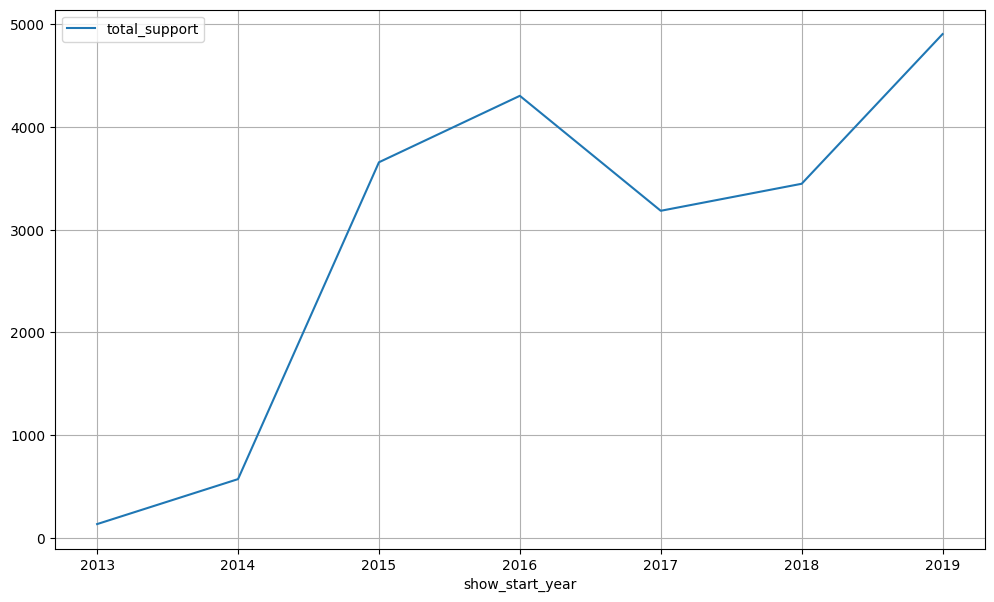

In [ ]:
support_films.pivot_table(index='show_start_year', values='total_support', aggfunc='sum') \
             .plot(kind='line', grid=True, figsize=(12, 7))

Самым финансируемым годом можно считать 2019, а следом за ним 2016. В целом прослеживается положительная тенденция увеличения финансирования с течением времени.

Далее оценим как менялись рейтинги фильмов по годам:

<Axes: xlabel='show_start_year'>

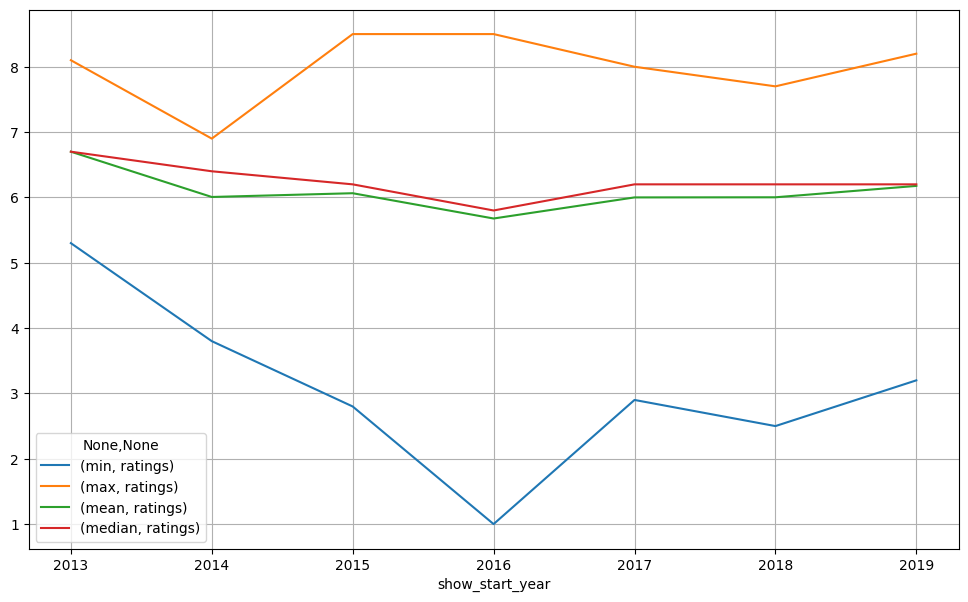

In [ ]:
support_films.pivot_table(index='show_start_year', values='ratings', aggfunc=['min', 'max', 'mean', 'median']) \
             .plot(kind='line', grid=True, figsize=(12, 7))

По среднему и медианному значению видим, что картина менялась незначительно, оценки находятся в диапазоне от 5,7 до 6,8. Самые рейтинговые фильмы вышли в 2015 и 2016 году, а самый провальный в 2016.

Посчитаем, есть ли зависимость рейтинга и окупаемости от суммы финансирования:

In [ ]:
print('Корреляция между финансированием от государства и рейтингом фильмов:', \
      support_films['total_support'].corr(support_films['ratings']))
print('Корреляция между финансированием от государства и окупаемостью фильмов:', \
      support_films['total_support'].corr(support_films['payback']))

Корреляция между финансированием от государства и рейтингом фильмов: 0.11828792686742055
Корреляция между финансированием от государства и окупаемостью фильмов: 0.09960865385305039


Построим диаграммы рассеяния для наглядности:

<Axes: xlabel='total_support', ylabel='ratings'>

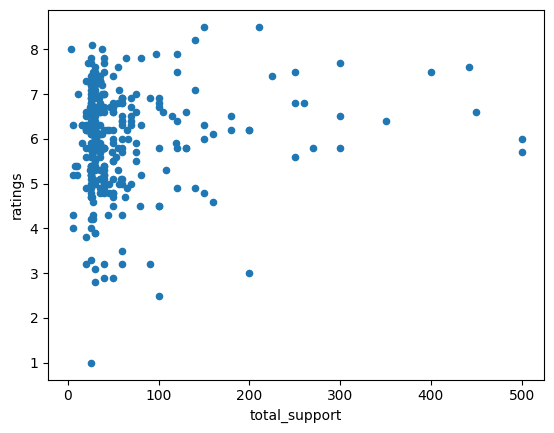

In [ ]:
support_films.plot(x='total_support', y='ratings', kind='scatter')

<Axes: xlabel='total_support', ylabel='payback'>

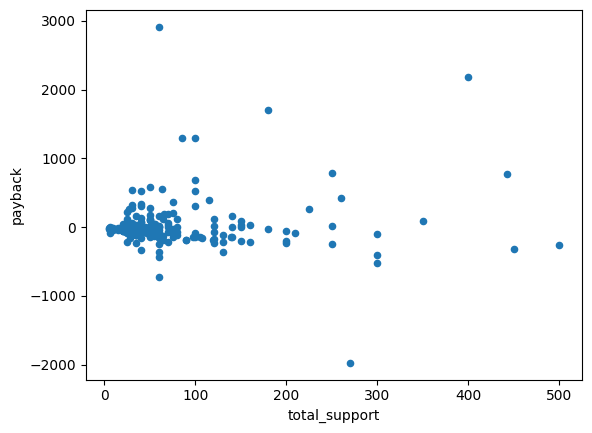

In [ ]:
support_films.plot(x='total_support', y='payback', kind='scatter')

Видим, что прямая зависимости факторов отсутствует, что означает если фильм был снят при финансовой помощи от государства, то совсем не обязательно, что он легко окупится или будет иметь высокие рейтинги среди зрителей.

Составим топ-10 жанров тех фильмов, которые были спонсированы государством, а также оценим их окупаемости и рейтинг:

In [ ]:
genres_top = support_films.pivot_table(index='main_genre', values=['total_support','ratings', 'payback'], aggfunc=['count', 'median'])
genres_top.columns = ['payback_count', 'ratings_count', 'total_support_count', 'payback_median', 'ratings_median', 'total_support_mediant'] 

genres_top.sort_values(by=['total_support_count'], ascending=False).head(10)

,payback_count,ratings_count,total_support_count,payback_median,ratings_median,total_support_mediant
main_genre,,,,,,
драма,87,92,93,-40.13,6.40,30.0
комедия,73,74,74,-26.86,5.75,35.0
мультфильм,30,31,31,-40.88,6.20,70.0
<unknown>,15,0,16,-46.05,NaN,30.0
триллер,15,15,15,-67.09,5.60,40.0
мелодрама,14,15,15,-53.55,6.20,27.5
фантастика,10,10,11,-46.88,5.95,30.0
фэнтези,11,11,11,-59.55,6.80,34.0
ужасы,10,10,10,-12.42,5.10,30.0


Самые поддерживаемые жанры государством - это драма, комедия и мультфильмы. При этом самый лучший рейтинг имеет фэнтези, а следом за ним драма и военные фильмы. Самую большую сумму финансирования обысно имеют мультфильмы. Но что самое интересное - ни один из жанров, как правило, не окупается, судя по медианному значению.

Посмотрим, есть ли зависимость между рейтингом и окупаемостью у финансируемых фильмов государством:

In [ ]:
print('Корреляция между финансированием от государства и окупаемостью фильмов:', \
      support_films['ratings'].corr(support_films['payback']))

Корреляция между финансированием от государства и окупаемостью фильмов: 0.09560205936582596


Построим диаграмму рассеяния для наглядности:

<Axes: xlabel='ratings', ylabel='payback'>

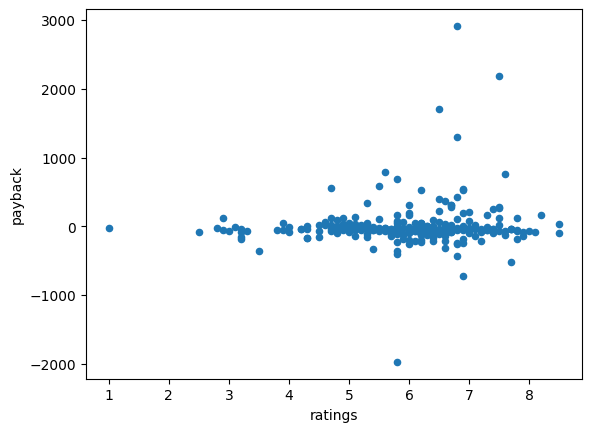

In [ ]:
support_films.plot(x='ratings', y='payback', kind='scatter')

Видим отсутствие корреляции между двумя факторами.

Посмотрим на 15 самых окупаемых фильмов и оценим их рейтинговость:

In [ ]:
support_films.sort_values(by=['payback'], ascending=False).head(15)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,share_of_funding,total_support,payback
7456,Холоп,111021719,2019-12-20,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25.0,...,Фонд кино,6.8,комедия,3073.57,2019,К.Шипенко,комедия,0.38,60.0,2913.57
5653,Движение вверх,111011817,2017-12-22,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт, драма",2779.69,2017,А.Мегердичев,спорт,0.68,400.0,2189.50
6549,Т-34,111024918,2018-12-21,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60.0,...,Фонд кино,6.5,"драма, военный, боевик",2271.75,2018,А.Сидоров,драма,0.32,180.0,1707.97
5505,Последний богатырь,111007017,2017-10-19,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50.0,...,Фонд кино,6.8,"комедия, фэнтези, приключения",1655.04,2017,Д.Дьяченко,комедия,0.28,100.0,1302.56
5708,Лёд,111000518,2018-02-02,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25.0,...,Фонд кино,NaN,<unknown>,1445.73,2018,О.Трофим,<unknown>,0.57,85.0,1297.14
3565,Притяжение (2016),111018116,2016-12-17,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.6,фантастика,1038.32,2016,Ф.Бондарчук,фантастика,1.00,250.0,788.32
2920,Экипаж .,111005416,2016-03-22,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,50.0,...,Фонд кино,7.6,"драма, триллер, приключения",1402.26,2016,Н.Лебедев,драма,0.70,442.1,766.98
5641,Ёлки Новые,111011617,2017-12-22,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,50.0,...,Фонд кино,5.8,"комедия, мелодрама",855.45,2017,Д.Киселев,комедия,0.57,100.0,681.07
5659,Три богатыря и принцесса Египта,114003317,2017-12-22,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50.0,...,Фонд кино,5.5,"мультфильм, приключения, семейный",759.23,2017,К.Феоктистов,мультфильм,0.29,50.0,584.77
2701,Самый Лучший День,111017815,2015-10-14,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,29.0,...,Фонд кино,4.7,"комедия, музыка",683.03,2015,А.Першин (псевдоним Ж.Крыжовников),комедия,0.48,63.0,552.41


Видим, что выстрелившие картины окупаются в несколько раз (а некоторые даже в несколько десятков), но при этом их рейтинги зачастую еле-еле дотягивают до 7 баллов из 10, что нельзя назвать хорошими результатами. Поэтому сложно говорить о заинтересованности зрителей в финансируемых картинах. Высокую окупаемость некоторых фильмов можно объяснить мощной рекалмной кампанией и низким возрастным рейтингом для привлечения максимального количества аудитории.

# Шаг 5. Общий вывод

Провели детальную предобработку данных:
* перепроверили типы данных и привели все к корректному значению;
* заполнили пропуски там, где это прдоставлялось возможным;
* проверили данные на возможные дубликаты и предположили причины их возникновения.

 Под одним и тем же названием фильмов несколько строк, но у всех разные прокатные удостоверения. Это может объясняться тем, что фильм выходил в прокат несколько раз или мог поменять правообладателя или даже быть немного изменён для каких-либо творческих или коммерческих целей. Поэтому одному и тому же фильму могло выдаваться несколько прокатных удостоверений. Также два прокатных удостоверения не уникальны, на каждый из них зарегестрированно по два разных фильма. Можем предположить, что такое могло произойти по ошибке в данных, или, возможно, эти фильмы шли вместе друг за другом за один сеанс;

* изучили категориальные и количественные значения, исправили ошибки;
* добавили новые столбцы.

Провели исследовательский анализ и вот его результаты:

Очевидна тенденция увелечения количества фильмов в прокате кинотеатров с прошествием времени. Если в 2010 году в прокат кинотеатров выходило чуть больше 100 фильмов, то в 2016 уже 526. В следующем году можем отметить небольшой упадок, но уже в 2019 году в прокате снова более 500 кинокартин.

Доля фильмов в прокате состовляет меньше половины (чуть больше 42%) по отношению к общему числу кинокартин за 10 лет.

Замечаем значительный рост кассовых сборов с течением времени. Минимальная сумма сборов была в 2010 (2,36 млн руб), а максимальная - в 2018 (49,67 млрд руб).

Почти во все года по суммам сборов лидируют фильмы с рейтингом возраста 16+ (кроме 2015, здесь лидируют фильмы с возрастным рейтингом 12+). Можем сделать предположение, что основная целевая аудитория кинотеатров - это подростки и молодёжь, которым интересны фильмы с данным возрастным рейтингом, поэтому они и являются лидерами по кассовым сборам.

Можем отметить интересную закономерность окупаемости фильмов, которые финансируются государством - больше 75% из них не окупается (об этом можем судить по отрицательному значению третьего квартиля), но при этом средний показатель положительный (425 тыс руб). Это говорит нам о том, что даже среди такого большого количества не окупившихся фильмов, есть кинокартины, которые окупаются в несколько раз.

Выяснили, что если фильм был снят при финансовой помощи от государства, то совсем не обязательно, что он легко окупится или будет иметь высокие рейтинги среди зрителей.

Самые поддерживаемые жанры государством - это драма, комедия и мультфильмы. При этом самый лучший рейтинг имеет фэнтези, а следом за ним драма и военные фильмы. Самую большую сумму финансирования обысно имеют мультфильмы. Но что самое интересное - ни один из жанров, как правило, не окупается, судя по медианному значению.

Видим, что выстрелившие картины окупаются в несколько раз (а некоторые даже в несколько десятков), но при этом их рейтинги зачастую еле-еле дотягивают до 7 баллов из 10, что нельзя назвать хорошими результатами. Поэтому сложно говорить о заинтересованности зрителей в финансируемых картинах. Высокую окупаемость некоторых фильмов можно объяснить мощной рекалмной кампанией и низким возрастным рейтингом для привлечения максимального количества аудитории.

Подводя итог нашего исследования, можем сказать, что фильмы, которые имеют финансовую государственную поддержку, имеют низкую заинтересованность у зрителей, так как большая часть из них не окупается в кинопрокате, а также имеет средние и низкие рейтинги. При этом стоит отметить, что есть и те фильмы, которые окупаются в несколько десятков раз и вместе с тем имеют неплохие оценки от зрителей, но их, к сожалению, слишком мало по отношению к общему числу финансируемых кинокартин.